<h1 id="exercise-1"><strong>Exercise 1</strong></h1>
<hr>
<h3>First Issue:</h3>
<p>Sets do not maintain order, the function should work with a list or first convert the set to a list and sort it to ensure consistent ordering.</p>
<h3>Second Issue:</h3>
<p> We need to account for the zero-based indexing of lists in Python.</p>

In [29]:
def id_to_fruit(fruit_id: int, fruits: list) -> str:
    if 0 <= fruit_id < len(fruits):
        return fruits[fruit_id]
    else:
        raise ValueError(f"Fruit with id {fruit_id} does not exist")

# Let's do a test run based on the provided example:
fruits_list = ["apple", "orange", "melon", "kiwi", "strawberry"]
name1 = id_to_fruit(1, fruits_list)
name3 = id_to_fruit(3, fruits_list)
name4 = id_to_fruit(4, fruits_list)

print(name1, name3, name4)


Cell number 1: orange
Cell number 3: kiwi
Cell number 4: strawberry


<h1>Exercise 2</h1>
<hr>
<h3>The Obvious Mistake:</h3>
<p>it mistakenly assigns the values of the second column (coords[:, 1]) to both the first and second columns.</p>

<h3>It still doesn't work properly?!</h3>
<p>It is due to the simultaneous assignment that is causing the first and second columns to be set to the same values. To fix this, we need to perform the swap operation in two steps or use a temporary variable.</p>

In [27]:
import numpy as np

def swap(coords: np.ndarray):
    # Create a copy of the first column
    first_col = coords[:, 0].copy()
    # Swap the first and second columns
    coords[:, 0] = coords[:, 1]
    coords[:, 1] = first_col
    # Create a copy of the third column
    third_col = coords[:, 2].copy()
    # Swap the third and fourth columns
    coords[:, 2] = coords[:, 3]
    coords[:, 3] = third_col
    return coords

# Example usage:
coords = np.array([[10, 5, 15, 6, 0],
[11, 3, 13, 6, 0],
[5, 3, 13, 6, 1],
[4, 4, 13, 6, 1],
[6, 5, 13, 16, 1]])
swapped_coords = swap(coords)
print(swapped_coords)

[[ 5 10  6 15  0]
 [ 3 11  6 13  0]
 [ 3  5  6 13  1]
 [ 4  4  6 13  1]
 [ 5  6 16 13  1]]


<h1>Exercise 3</h1>
<hr>
<h3>Where's the problem?</h3>
<p>To be honest, I'm not experienced or that familiar in this field! but the way I see it, the precision values are being plotted against the recall values in the wrong order. Precision should typically be plotted on the y-axis and recall on the x-axis.</p>
<code>    plt.plot(results[:, 1], results[:, 0])</code>

<h3>how to fix it?</h3>
<p>We need to simply swap the columns when plotting the data</p>

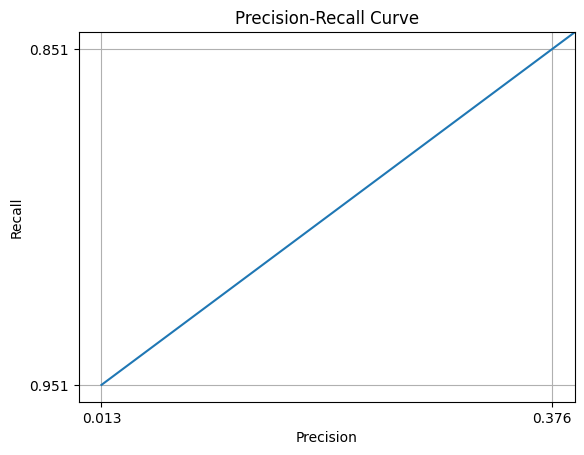

In [22]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def plot_data(csv_file_path: str):
    """
    This code plots the precision-recall curve based on data from a .csv file,
    where precision is on the x-axis and recall is on the y-axis.

    :param csv_file_path: The CSV file containing the data to plot.
    """
    # Load data
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)  # Skip header
        for row in csv_reader:
            results.append(row)
        results = np.stack(results)

    # Plot precision-recall curve
    plt.plot(results[:, 0], results[:, 1])  # Swap the columns
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()

# Generate data and plot
data_file_path = "data_file.csv"
with open(data_file_path, "w", newline='') as f:
    w = csv.writer(f)
    w.writerow(["precision", "recall"])
    w.writerows([
        [0.013, 0.951],
        [0.376, 0.851],
        [0.441, 0.839],
        [0.570, 0.758],
        [0.635, 0.674],
        [0.721, 0.604],
        [0.837, 0.531],
        [0.860, 0.453],
        [0.962, 0.348],
        [0.982, 0.273],
        [1.0, 0.0]
    ])

plot_data(data_file_path)

<h1>Exercise 4</h1>
<hr>
<p>It seems that the error is occurring because the size of the real_labels tensor (used for calculating the generator loss) is fixed to [32, 1], while the batch size of the generated samples is 64, resulting in a size mismatch between the target and input tensors.

this project generally seems beyond my level of python programming, but <strong>with some help</strong> I could figure out how to dynamically adjust the size of the real_labels tensor based on the actual batch size of the generated samples.</p>


Epoch [0/100], Batch Step [937/938], Discriminator Loss: 0.0583, Generator Loss: 4.4318


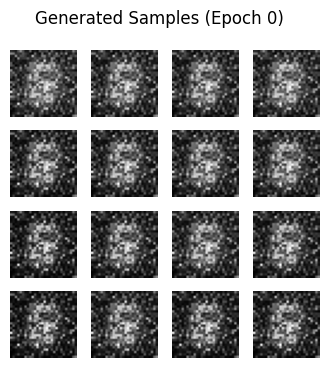

Epoch [1/100], Batch Step [937/938], Discriminator Loss: 0.0176, Generator Loss: 9.0751


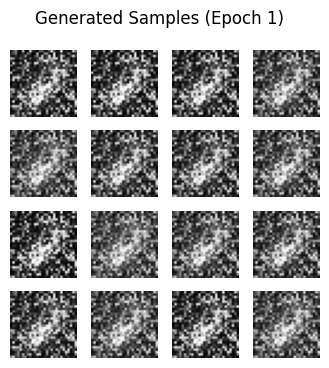

Epoch [2/100], Batch Step [937/938], Discriminator Loss: 0.0066, Generator Loss: 6.8618


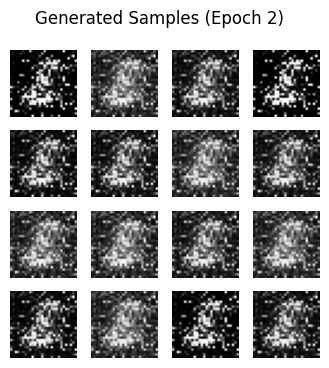

Epoch [3/100], Batch Step [937/938], Discriminator Loss: 0.0411, Generator Loss: 5.9889


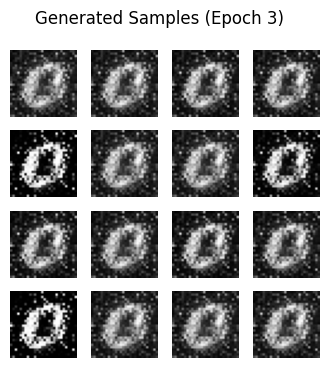

Epoch [4/100], Batch Step [937/938], Discriminator Loss: 0.0260, Generator Loss: 8.9006


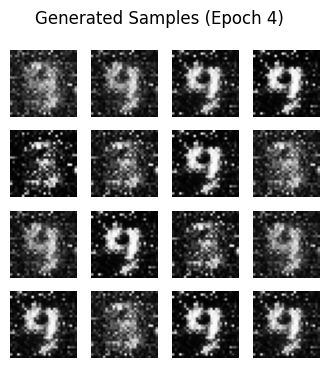

Epoch [5/100], Batch Step [937/938], Discriminator Loss: 0.0282, Generator Loss: 5.8373


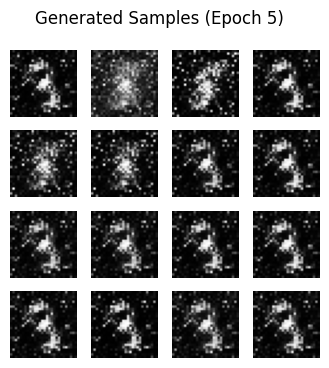

Epoch [6/100], Batch Step [937/938], Discriminator Loss: 0.0390, Generator Loss: 5.4636


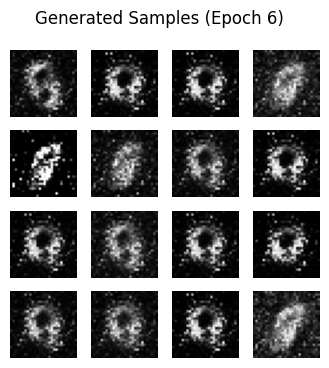

Epoch [7/100], Batch Step [937/938], Discriminator Loss: 0.2334, Generator Loss: 6.8152


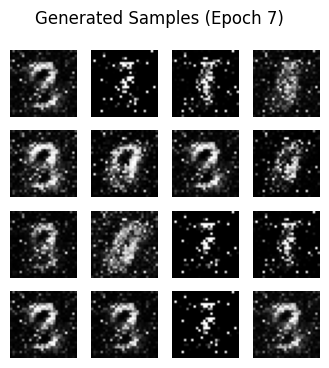

Epoch [8/100], Batch Step [937/938], Discriminator Loss: 0.2004, Generator Loss: 4.6251


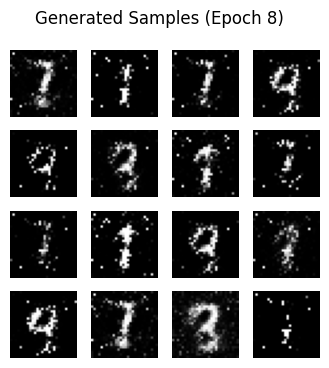

Epoch [9/100], Batch Step [937/938], Discriminator Loss: 0.2098, Generator Loss: 4.8725


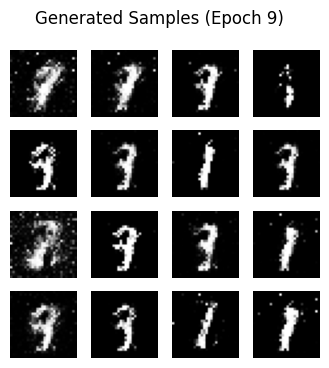

Epoch [10/100], Batch Step [937/938], Discriminator Loss: 0.2888, Generator Loss: 3.4830


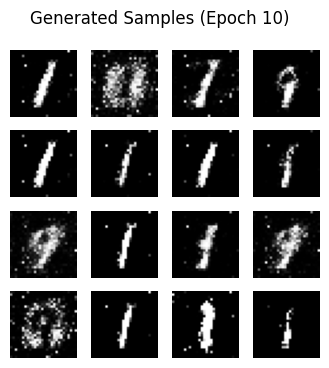

Epoch [11/100], Batch Step [937/938], Discriminator Loss: 0.2349, Generator Loss: 2.8626


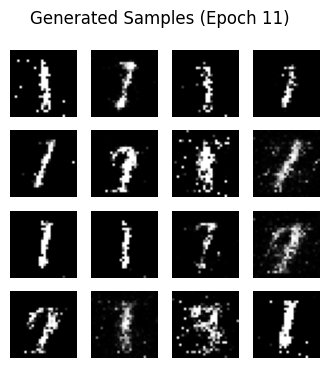

Epoch [12/100], Batch Step [937/938], Discriminator Loss: 0.3575, Generator Loss: 3.2754


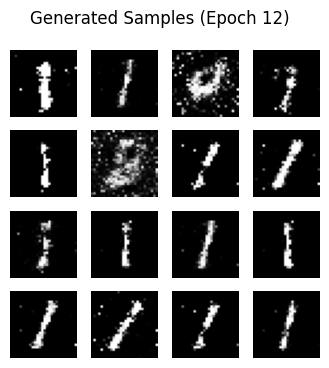

Epoch [13/100], Batch Step [937/938], Discriminator Loss: 0.5550, Generator Loss: 2.2170


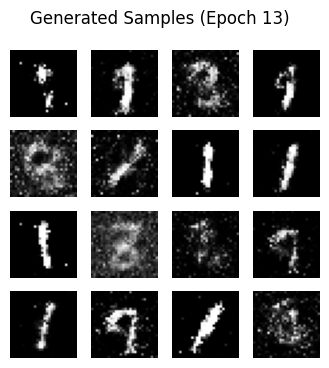

Epoch [14/100], Batch Step [937/938], Discriminator Loss: 0.5626, Generator Loss: 2.3441


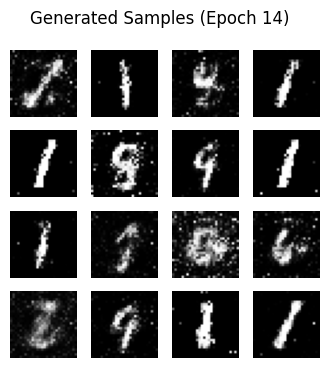

Epoch [15/100], Batch Step [937/938], Discriminator Loss: 0.5322, Generator Loss: 1.7845


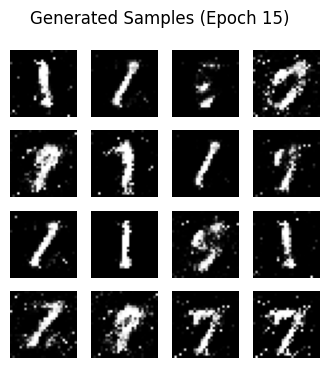

Epoch [16/100], Batch Step [937/938], Discriminator Loss: 0.4952, Generator Loss: 1.8824


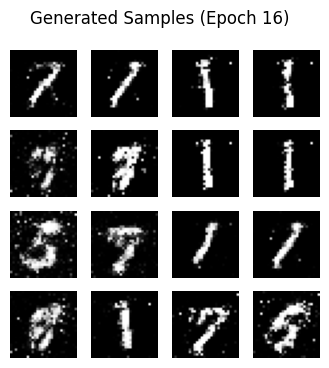

Epoch [17/100], Batch Step [937/938], Discriminator Loss: 0.7055, Generator Loss: 1.5951


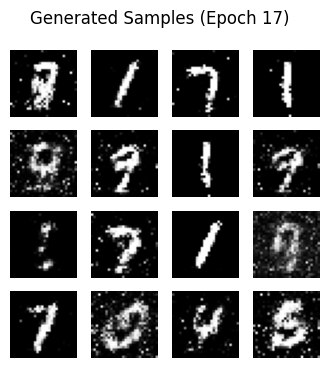

Epoch [18/100], Batch Step [937/938], Discriminator Loss: 0.8079, Generator Loss: 1.6283


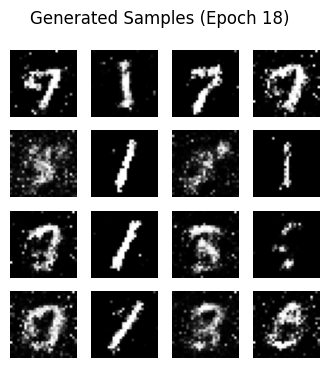

Epoch [19/100], Batch Step [937/938], Discriminator Loss: 0.8806, Generator Loss: 1.7784


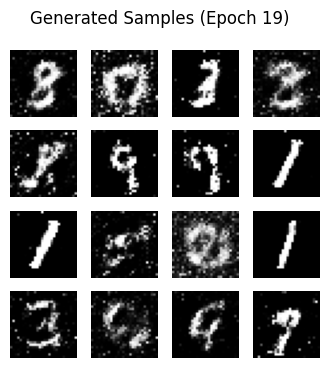

Epoch [20/100], Batch Step [937/938], Discriminator Loss: 0.8644, Generator Loss: 1.5295


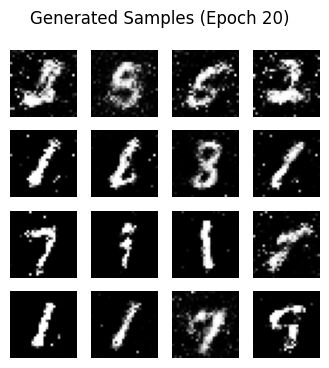

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from IPython.display import display

# Generator
class Generator(nn.Module):
    """
    Generator class for the GAN
    """

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

# Discriminator
class Discriminator(nn.Module):
    """
    Discriminator class for the GAN
    """
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

# Training function
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):
    """
    The method trains a Generative Adversarial Network and is based on:
    https://realpython.com/generative-adversarial-networks/

    The Generator network tries to generate convincing images of handwritten digits.
    The Discriminator needs to detect if the image was created by the Generator or if the image is a real image from
    a known dataset (MNIST).
    If both the Generator and the Discriminator are optimized, the Generator is able to create images that are difficult
    to distinguish from real images. This is the goal of a GAN.

    This code produces the expected results at first attempt at about 50 epochs.

    :param batch_size: The number of images to train in one epoch.
    :param num_epochs: The number of epochs to train the GAN.
    :param device: The computing device to use. If CUDA is installed and working, then 'cuda:0' is chosen;
        otherwise, 'cpu' is chosen. Note: Training a GAN on the CPU is very slow.
    """

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # Set up generator, discriminator, loss function, and optimizers
    generator = Generator().to(device)
    discriminator = Discriminator().to(device)
    loss_function = nn.BCELoss()
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=0.0001)
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=0.0001)

    # Training loop
    for epoch in range(num_epochs):
        for n, (real_samples, _) in enumerate(train_loader):
            real_samples = real_samples.to(device)

            # Train discriminator
            discriminator.zero_grad()
            latent_space_samples = torch.randn(batch_size, 100).to(device)
            generated_samples = generator(latent_space_samples)
            real_labels = torch.ones(real_samples.size(0), 1).to(device)  # Dynamically adjust the size of real labels
            fake_labels = torch.zeros(batch_size, 1).to(device)
            discriminator_loss_real = loss_function(discriminator(real_samples), real_labels)
            discriminator_loss_fake = loss_function(discriminator(generated_samples.detach()), fake_labels)
            discriminator_loss = discriminator_loss_real + discriminator_loss_fake
            discriminator_loss.backward()
            optimizer_discriminator.step()

           # Train generator
            generator.zero_grad()
            latent_space_samples = torch.randn(batch_size, 100).to(device)
            generated_samples = generator(latent_space_samples)
            real_labels = torch.ones(generated_samples.size(0), 1).to(device)  # Dynamically adjust the size of real labels
            generator_loss = loss_function(discriminator(generated_samples), real_labels)
            generator_loss.backward()
            optimizer_generator.step()
            # Show loss and samples generated
            if n == len(train_loader) - 1:
                print(f"Epoch [{epoch}/{num_epochs}], Batch Step [{n}/{len(train_loader)}], "
                      f"Discriminator Loss: {discriminator_loss.item():.4f}, "
                      f"Generator Loss: {generator_loss.item():.4f}")
                display_samples(generator, epoch, device)

# Function to display generated samples
def display_samples(generator, epoch, device, num_samples=16):
    generator.eval()
    latent_space_samples = torch.randn(num_samples, 100).to(device)
    generated_samples = generator(latent_space_samples).cpu().detach()
    fig = plt.figure(figsize=(4, 4))
    for i in range(num_samples):
        plt.subplot(4, 4, i + 1)
        plt.imshow(generated_samples[i].view(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Generated Samples (Epoch {epoch})')
    plt.show()

# Start training
train_gan(batch_size=64, num_epochs=100)
